In [9]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [78]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [79]:
inmuebles_bogota_bd = pd.read_csv('/content/drive/MyDrive/Proyecto_Alura/inmuebles_bogota.csv')

In [57]:
inmuebles_bogota_bd.head()

,Tipo,Descripcion,Habitaciones,Baños,Área,Barrio,UPZ,Valor
0,Apartamento,Apartamento en venta en Zona Noroccidental,3,2,70,Zona Noroccidental,CHAPINERO: Pardo Rubio + Chapinero,$ 360.000.000
1,Casa,Casa en venta en Castilla,4,3,170,Castilla,KENNEDY: Castilla + Bavaria,$ 670.000.000
2,Apartamento,Apartamento en venta en Chico Reservado,3,3,144,Chico Reservado,CHAPINERO: Chicó Lago + El Refugio,$ 1.120.000.000
3,Apartamento,Apartamento en venta en Usaquén,3,2,154,Usaquén,Usaquén,$ 890.000.000
4,Apartamento,Apartamento en venta en Bella Suiza,2,3,128,Bella Suiza,USAQUÉN: Country Club + Santa Bárbara,$ 970.000.000


La base de datos cuenta con los siguientes datos: tipo, descripción, número de habitaciones, número de baños, área (m2), barrio, UPZ y valor del inmueble.

In [12]:
inmuebles_bogota_bd.shape

(9520, 8)

Contamos con un total de 9 528 de filas (apartamentos) y 8 columnas (tipo de información de cada apartamento).

In [13]:
inmuebles_bogota_bd.columns

Index(['Tipo', 'Descripcion', 'Habitaciones', 'Baños', 'Área', 'Barrio', 'UPZ',
       'Valor'],
      dtype='object')

Observamos el título de cada columna y nos encontramos con la columna "Baños" y "Área", que pueden traer conflictos por el tipo de codificación.

In [80]:
inmuebles_bogota_columnas = {'Baños' : 'Banos', 'Área' : 'Area'}
inmuebles_bogota_bd = inmuebles_bogota_bd.rename(columns = inmuebles_bogota_columnas)
inmuebles_bogota_bd.sample(5)

,Tipo,Descripcion,Habitaciones,Banos,Area,Barrio,UPZ,Valor
1529,Apartamento,Apartamento en venta en Bosa,2,1,42,Bosa,Bosa Central,$ 117.000.000
5098,Apartamento,Apartamento en venta en Kennedy,3,1,50,Kennedy,Kennedy Central,$ 155.000.000
8716,Apartamento,Apartamento en venta en Bosa,3,1,48,Bosa,Bosa Central,$ 120.000.000
9213,Apartamento,Apartamento en venta en Suba,3,2,69,Suba,Suba,$ 305.000.000
2278,Apartamento,Apartamento en venta en Usaquén,3,3,101,Usaquén,Usaquén,$ 460.000.000


Realizamos el cambio de nombre de la columna "Baños" por "Banos" y de "Área" por "Area" para facilitar el análisis.

In [15]:
inmuebles_bogota_bd.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9520 entries, 0 to 9519
Data columns (total 8 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   Tipo          9520 non-null   object
 1   Descripcion   9520 non-null   object
 2   Habitaciones  9520 non-null   int64 
 3   Banos         9520 non-null   int64 
 4   Area          9520 non-null   int64 
 5   Barrio        9520 non-null   object
 6   UPZ           9478 non-null   object
 7   Valor         9520 non-null   object
dtypes: int64(3), object(5)
memory usage: 595.1+ KB


Analizamos nuestra base de datos:
- Contamos con un total de 9520 entradas.
- Las columnas "Tipo", "Descripcion", "Habitaciones", "Banos", "Area", "Barrio" y "Valor" no contienen valores nulos; mientras que la columna "UPZ" presenta 42 valores nulos.
- Las columnas "Tipo", "Descripcion", "Barrio", "UPZ" y "Valor" son de tipo texto; mientras que las columnas "Habitaciones", "Banos", "Area" son de tipo entero.

In [16]:
inmuebles_bogota_bd.iloc[300]

Tipo                                Apartamento
Descripcion     Apartamento en venta en Kennedy
Habitaciones                                  2
Banos                                         1
Area                                         42
Barrio                                  Kennedy
UPZ                             Kennedy Central
Valor                             $ 116.100.000
Name: 300, dtype: object

Analizamos los datos del índice 300.

In [81]:
round(inmuebles_bogota_bd.Area.mean(),2)

146.66

Nuestra base de datos registra inmuebles con un área media de 146.66 m2

In [82]:
sum(inmuebles_bogota_bd.Barrio == "Chico Reservado")

225

Observamos que los inmuebles que encontramos en el barrio "Chico Reservado" suman un total de 225.

In [83]:
barrio_ChicoReservado = inmuebles_bogota_bd[inmuebles_bogota_bd.Barrio == "Chico Reservado"]
barrio_ChicoReservado.sample(5)

,Tipo,Descripcion,Habitaciones,Banos,Area,Barrio,UPZ,Valor
3396,Apartamento,Apartamento en venta en Chico Reservado,3,4,150,Chico Reservado,CHAPINERO: Chicó Lago + El Refugio,$ 900.000.000
8183,Apartamento,Apartamento en venta en Chico Reservado,3,3,260,Chico Reservado,CHAPINERO: Chicó Lago + El Refugio,$ 820.000.000
2676,Apartamento,Apartamento en venta en Chico Reservado,1,1,72,Chico Reservado,CHAPINERO: Chicó Lago + El Refugio,$ 380.000.000
4792,Apartamento,Apartamento en venta en Chico Reservado,3,4,328,Chico Reservado,CHAPINERO: Chicó Lago + El Refugio,$ 4.300.000.000
1614,Apartamento,Apartamento en venta en Chico Reservado,1,2,49,Chico Reservado,CHAPINERO: Chicó Lago + El Refugio,$ 477.000.000


Creamos un nuevo dataframe a partir de los inmuebles que se encuentran en el barrio "Chico Reservado".

In [42]:
round(barrio_ChicoReservado.Area.mean(),2)

142.79

Los inmuebles pertenecientes al barrio "Chico Reservado" cuentan con un área media de 142.79 m2.

In [43]:
len(inmuebles_bogota_bd.Barrio.value_counts())

149

Nuestra base de datos cuenta con un total de 149 barrios.

In [44]:
inmuebles_bogota_bd.Barrio.value_counts()

Usaquén               1105
Zona Noroccidental     877
Bosa                   589
Kennedy                589
Cedritos               554
                      ... 
Colinas De Suba          1
La Estanzuela            1
Roma                     1
Alameda                  1
Prado Veraniego          1
Name: Barrio, Length: 149, dtype: int64

El barrio "Usaquén" alberga la mayor cantidad de inmuebles.

<Axes: title={'center': 'Número de inmuebles registrados por barrio'}, xlabel='Barrio', ylabel='Nro inmuebles'>

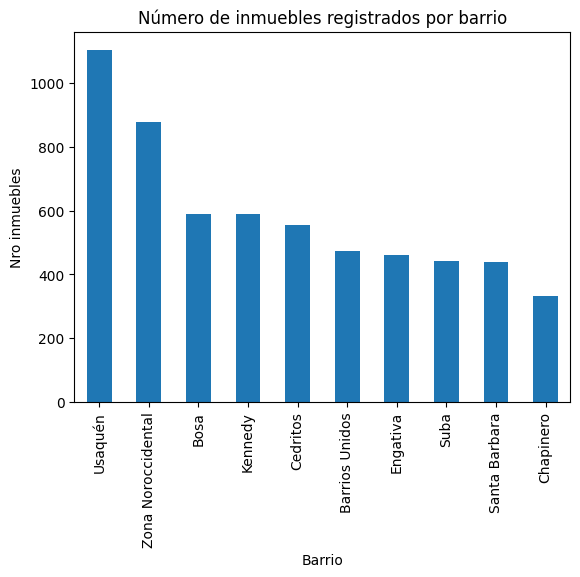

In [84]:
inmuebles_bogota_barrio = inmuebles_bogota_bd.Barrio.value_counts()
inmuebles_bogota_barrio.head(10).plot.bar(title = "Número de inmuebles registrados por barrio", xlabel = "Barrio", ylabel = "Nro inmuebles")

In [46]:
inmuebles_bogota_bd.groupby("Barrio")["Area"].mean().sort_values(ascending=False).head(10)

Barrio
Modelia                  4316.750000
Libertador                642.000000
Bosa Piamonte             400.000000
La Soledad                378.625000
Restrepo                  336.500000
Santa Librada             328.000000
Las Ferias                320.000000
Santa Ana                 309.375000
Veraguas                  302.666667
Bellavista Occidental     286.200000
Name: Area, dtype: float64

Se muestran los 10 barrios que cuentan con inmuebles con la mayor área promedio.

In [103]:
inmuebles_bogota_bd["Tipo de moneda"] = inmuebles_bogota_bd.Valor.str.split(expand = True)[0]
inmuebles_bogota_bd["Precio"] = inmuebles_bogota_bd.Valor.str.split(expand = True)[1]
inmuebles_bogota_bd["Precio"] = inmuebles_bogota_bd["Precio"].str.replace(".", "", regex = True)
inmuebles_bogota_bd["Precio_Millon"] = inmuebles_bogota_bd["Precio"].astype("float")/1000000
inmuebles_bogota_bd.sample(3)

,Tipo,Descripcion,Habitaciones,Banos,Area,Barrio,UPZ,Valor,Tipo de moneda,Precio,Precio_Millon
1806,Apartamento,Apartamento en venta en Chico Norte,2,2,58,Chico Norte,CHAPINERO: Chicó Lago + El Refugio,$ 620.000.000,$,620000000,620.0
5769,Apartamento,Apartamento en venta en Zona Noroccidental,3,3,88,Zona Noroccidental,CHAPINERO: Pardo Rubio + Chapinero,$ 650.000.000,$,650000000,650.0
1649,Apartamento,Apartamento en venta en Suba,3,4,169,Suba,Suba,$ 1.200.000.000,$,1200000000,1200.0


Al tratarse la columna "Valor" de un String, se procede a separar su valor numérico para poder trabajarlo con mayor facilidad.

In [104]:
inmuebles_bogota_bd.describe()

,Habitaciones,Banos,Area,Precio_Millon
count,9520.000000,9520.000000,9520.000000,9520.000000
mean,3.072479,2.447899,146.664706,602.062354
std,2.049856,1.255314,1731.379622,704.602062
min,1.000000,0.000000,2.000000,60.000000
25%,2.000000,2.000000,57.000000,250.000000
50%,3.000000,2.000000,80.000000,409.182500
75%,3.000000,3.000000,135.000000,680.000000
max,110.000000,9.000000,166243.000000,16000.000000


Respecto a todos nuestros datos sobre inmuebles en Bogotá, observamos que en promedio estos cuentan con 3 habitaciones, 2 baños y un área de 146 m2. Así mismo, el número mínimo de habitaciones es 1, de baños es 0 y de área es 2 m2; mientras que el número máximo de habitaciones por inmueble es 110, de baños es 9 y área es 166 243 m2.

<Axes: title={'center': 'Histograma de precios de inmuebles'}, ylabel='Frequency'>

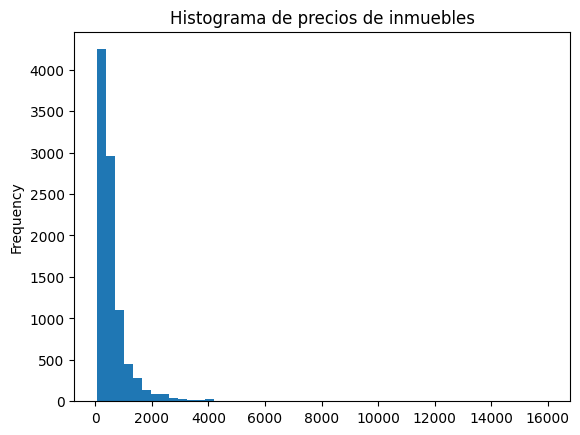

In [86]:
inmuebles_bogota_bd["Precio_Millon"].plot.hist(bins=50, title="Histograma de precios de inmuebles")

Se observa, a grandes rasgos que la distribución de los precios de los inmuebles estudiados se encuentra en su mayoría entre 0 y 2000 millones de pesos colombianos.

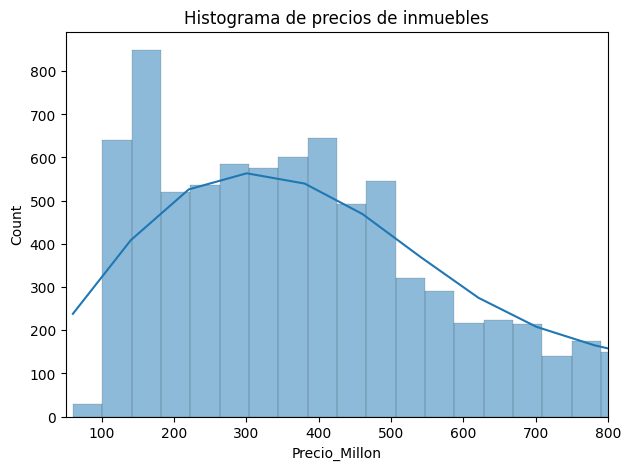

In [107]:
plt.figure(figsize = (7,5))
sns.histplot(data = inmuebles_bogota_bd, x = "Precio_Millon", kde = True).set_title("Histograma de precios de inmuebles")
plt.xlim(50,800)
plt.show()

De acuerdo a nuestro análisis estadístico, sabemos que el 25% de nuestros inmuebles tienen un precio menor a 60 millones de pesos colombianor, mientras que el 75% tiene un precio menor a 680 millones de pesos colombianos. A partir de estos datos, armamos un histograma para observar más a detalle esta distribución.

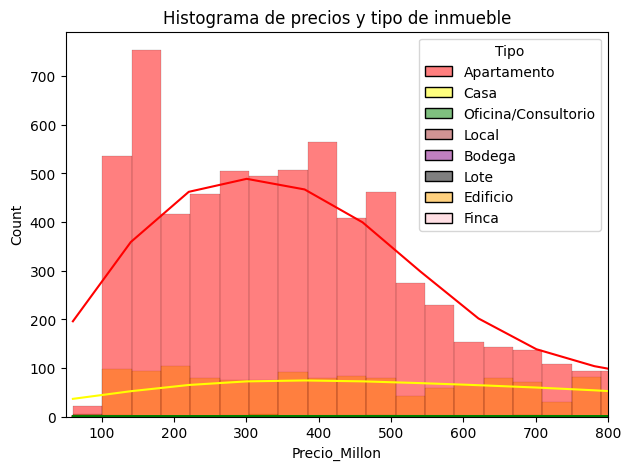

In [128]:
plt.figure(figsize = (7,5))
colores_tipo_inmueble = {"Apartamento":"red", "Casa":"yellow","Oficina/Consultorio":"green", "Edificio":"orange", "Lote":"black", "Bodega":"purple", "Local":"brown", "Finca":"pink"}
sns.histplot(data = inmuebles_bogota_bd, x = "Precio_Millon", kde = True, hue = "Tipo", palette = colores_tipo_inmueble).set_title("Histograma de precios y tipo de inmueble")
plt.xlim(50,800)
plt.show()

En el histograma de precios y tipo de inmueble observamos que en el rango estudiado (50 - 800 millones de pesos colombianos) existe una mayor presencia de apartamentos y casas.

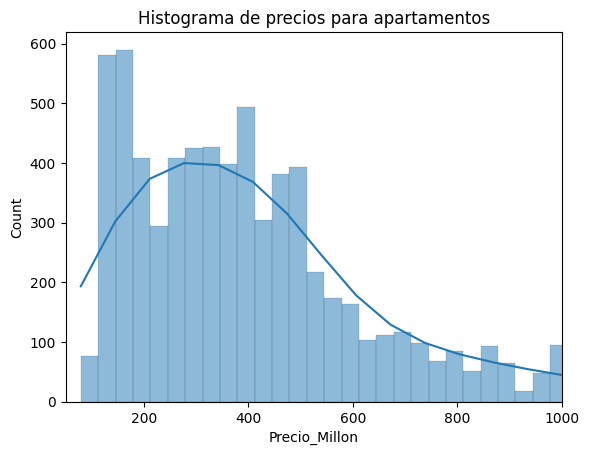

In [126]:
inmuebles_bogota_tipo_apartamento = inmuebles_bogota_bd.query("Tipo == 'Apartamento'")
sns.histplot(data = inmuebles_bogota_tipo_apartamento, x = "Precio_Millon", kde = True).set_title("Histograma de precios para apartamentos")
plt.xlim(50,1000)
plt.show()

En el histograma visto se aprecia más a detalle la distribución de apartamentos por precio.

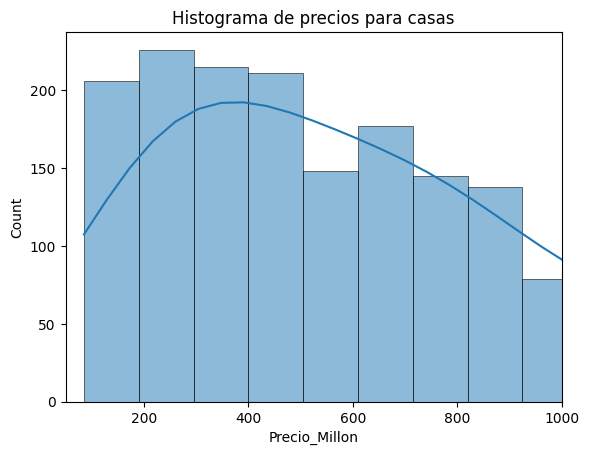

In [130]:
inmuebles_bogota_tipo_casa = inmuebles_bogota_bd.query("Tipo == 'Casa'")
sns.histplot(data = inmuebles_bogota_tipo_casa, x = "Precio_Millon", kde = True).set_title("Histograma de precios para casas")
plt.xlim(50,1000)
plt.show()

En el histograma visto se aprecia más a detalle la distribución de casas por precio.

In [135]:
inmuebles_bogota_bd["Precio_Millon/m2"] = round(inmuebles_bogota_bd.Precio_Millon / inmuebles_bogota_bd.Area,3)
inmuebles_bogota_bd.sample(3)

,Tipo,Descripcion,Habitaciones,Banos,Area,Barrio,UPZ,Valor,Tipo de moneda,Precio,Precio_Millon,Precio_Millon/m2
8948,Apartamento,Apartamento en venta en Usaquén,3,2,97,Usaquén,Usaquén,$ 460.000.000,$,460000000,460.0,4.742
6648,Apartamento,Apartamento en venta en Santa Barbara,3,2,84,Santa Barbara,USAQUÉN: Country Club + Santa Bárbara,$ 390.000.000,$,390000000,390.0,4.643
3947,Casa,Casa en venta en Zona Noroccidental,4,4,245,Zona Noroccidental,CHAPINERO: Pardo Rubio + Chapinero,$ 920.000.000,$,920000000,920.0,3.755


Agregamos una nueva columna para poder evaluar el precio en millones de pesos colombianos por m2 de cada inmueble evaluado.

In [191]:
inmuebles_precio_m2_barrio = inmuebles_bogota_bd.groupby("Barrio")["Precio_Millon/m2"].mean().sort_values(ascending=False)
inmuebles_precio_m2_barrio

Barrio
El Virrey        10.201833
Santa Ana         9.363875
La Merced         8.977000
Chico Norte       8.537750
Los Rosales       8.173770
                   ...    
Santa Librada     1.952000
Las Ferias        1.719000
Libertador        1.662000
Roma              1.346000
Bosa Piamonte     1.175000
Name: Precio_Millon/m2, Length: 149, dtype: float64

Ahora observamos los promedios de precio/m2 por barrio, encontrando que el mayor precio por m2 se encuentra en el barrio "El Virrey", mientras que el menor precio por m2 se encuentra en el barrio "Bosa Piamonte.

In [194]:
df_precio_m2_barrio = pd.DataFrame({'Barrio': inmuebles_precio_m2_barrio.index, 'Precio_Millon/m2': inmuebles_precio_m2_barrio.values})
df_precio_m2_barrio

,Barrio,Precio_Millon/m2
0,El Virrey,10.201833
1,Santa Ana,9.363875
2,La Merced,8.977000
3,Chico Norte,8.537750
4,Los Rosales,8.173770
...,...,...
144,Santa Librada,1.952000
145,Las Ferias,1.719000
146,Libertador,1.662000
147,Roma,1.346000


Ahora tenemos un dataframe con el precio promedio por m2 de cada barrio.

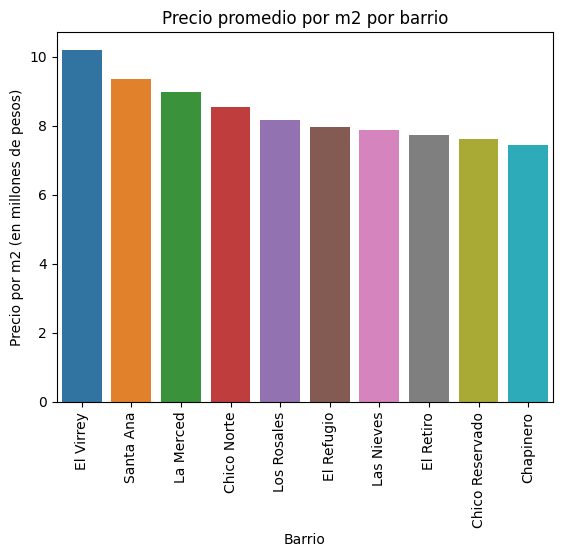

In [198]:
sns.barplot(data = df_precio_m2_barrio.head(10), x = "Barrio", y = "Precio_Millon/m2").set_title("Precio promedio por m2 por barrio")
plt.xlabel("Barrio")
plt.ylabel("Precio por m2 (en millones de pesos)")
plt.xticks(rotation = 90)
plt.show()

Ahora vemos el top 10 de los barrios con mayor precio por m2.